In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob

In [3]:
df= pd.read_csv('apps.csv')

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [7]:
df.dropna(inplace=True)

In [8]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)


<ipython-input-8-3129c0e20040>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
<ipython-input-8-3129c0e20040>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [10]:
category_counts = df['Category'].value_counts()
print(category_counts)

FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64


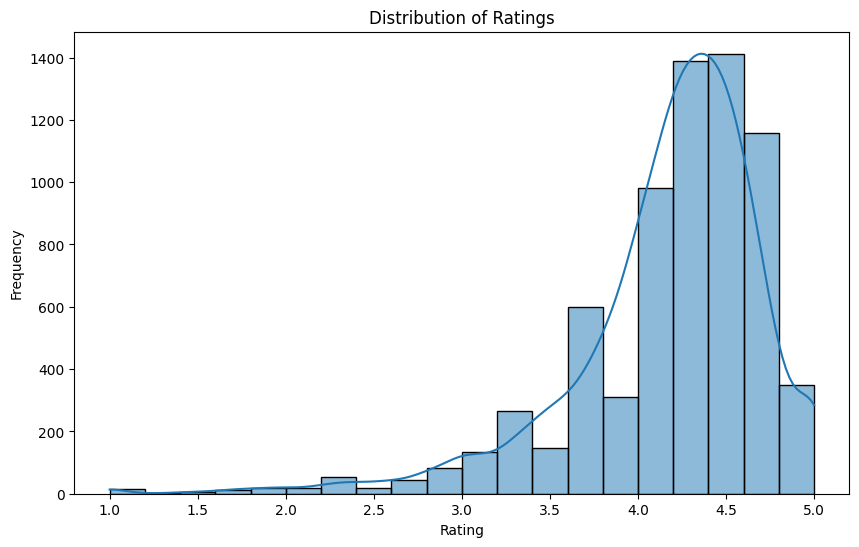

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


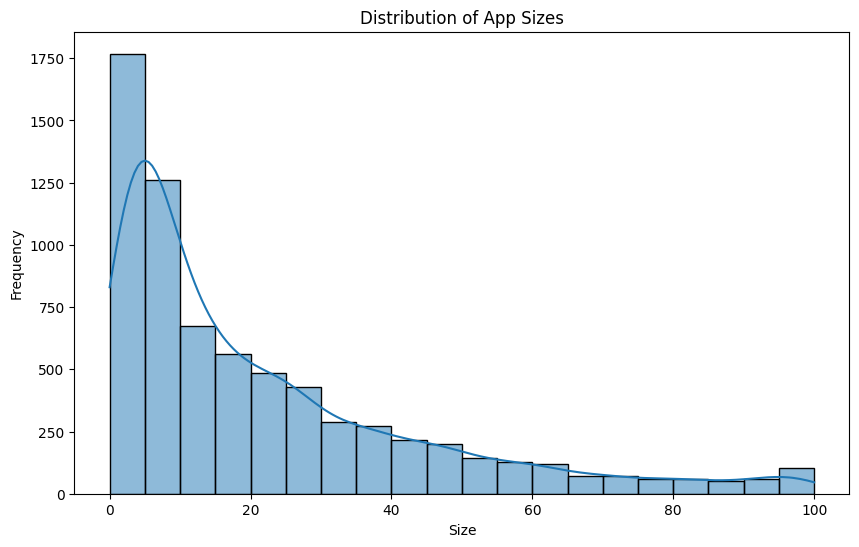

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size'], bins=20, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [14]:
category_installs = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
print(category_installs)

Category
GAME                   1.386100e+07
ENTERTAINMENT          9.968125e+06
COMMUNICATION          9.669763e+06
VIDEO_PLAYERS          7.738055e+06
NEWS_AND_MAGAZINES     7.733120e+06
PHOTOGRAPHY            7.323006e+06
PRODUCTIVITY           5.813014e+06
SHOPPING               4.868024e+06
TOOLS                  4.607286e+06
HEALTH_AND_FITNESS     3.960504e+06
SPORTS                 3.648468e+06
SOCIAL                 3.578465e+06
PERSONALIZATION        3.266905e+06
WEATHER                2.585930e+06
FAMILY                 2.351199e+06
FOOD_AND_DRINK         1.895385e+06
MAPS_AND_NAVIGATION    1.851229e+06
EDUCATION              1.786386e+06
BUSINESS               1.740013e+06
ART_AND_DESIGN         1.710829e+06
TRAVEL_AND_LOCAL       1.621548e+06
LIFESTYLE              1.503789e+06
HOUSE_AND_HOME         1.029640e+06
FINANCE                9.480128e+05
LIBRARIES_AND_DEMO     8.330500e+05
BOOKS_AND_REFERENCE    8.140720e+05
AUTO_AND_VEHICLES      6.947587e+05
DATING             

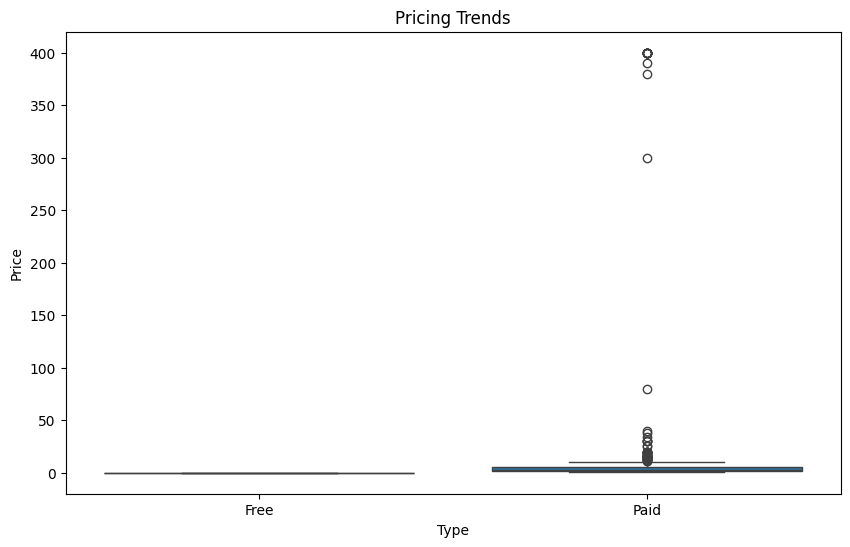

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Pricing Trends')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

In [16]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Reviews'].apply(get_sentiment)


In [17]:
fig = px.scatter(df, x='Rating', y='Installs', color='Category', hover_name='App', size='Reviews',
                 title='Rating vs Installs with App Category and Reviews', log_x=True, log_y=True,
                 labels={'Rating': 'Rating', 'Installs': 'Installs (Log Scale)', 'Reviews': 'Reviews'})
fig.show()